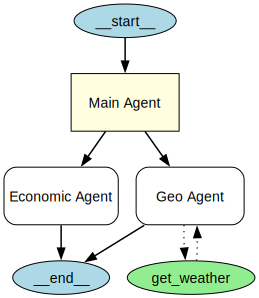

In [23]:
import os
import sys
from agents import Agent, Runner, function_tool, ItemHelpers, SQLiteSession, function_tool
from agents.extensions.visualization import draw_graph
from pydantic import BaseModel

class Answer(BaseModel):
    answer: str
    background_explanation: str


@function_tool
def get_weather(city: str) -> str:
    """
    Get weather by city
    """
    return "30 degrees"

session = SQLiteSession("user_1","ai-memory.db")

geo_agent = Agent(
    name="Geo Agent",
    instructions="You are a expert in geography. you answer question related to geography.",
    handoff_description="Use this agent if the question is related to geography.",\
    tools=[get_weather],
    output_type=Answer,
)

economics_agent = Agent(
    name="Economic Agent",
    instructions="You are a expert in economy. you answer question related to economy.",
    handoff_description="Use this agent if the question is related to economy."
)

main_agent = Agent(
    name="Main Agent",
    instructions="You are a user facing agent. For most questions, prefer transferring to a specialized agent rather than answering directly.",
    handoffs=[geo_agent, economics_agent]
)


result = await Runner.run(
    main_agent,
    "대한민국의 수도는 어디임?",
    session=session
)

draw_graph(main_agent)


In [24]:
print(result.final_output)
print(result.last_agent.name)

answer='대한민국의 수도는 서울입니다.' background_explanation='서울(Seoul)은 한반도의 중부에 위치하며, 1394년 조선 건국 이후 줄곧 한국의 정치, 경제, 문화의 중심 도시로 자리잡아 왔습니다. 정부 주요 기관(청와대, 국회 등)과 대통령 집무실, 각종 공공기관이 모두 서울에 위치해 있습니다. 또한, 서울은 한강을 끼고 있는 인구 약 천만 명의 대도시로, 국제적으로도 매우 큰 위상을 지닌 동아시아의 대표적인 수도입니다.'
Geo Agent
